<a href="https://colab.research.google.com/github/Hemanath17/MLalgorithms/blob/main/linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression is the process of building a model with the relationship between two variables by fitting a linear equation by the gathered datas

In [1]:
#load libraries
import pandas as pd
import numpy as np

In [2]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2021-09-06 01:26:12--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2021-09-06 01:26:12--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.005s  

2021-09-06 01:26:12 (7.30 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



In [3]:
#load dataset and print
housing = pd.read_csv("BostonHousing.csv")
housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
#split x and y variables
y = housing.medv
y #print y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [5]:
x = housing.drop(['medv'], axis=1) #drop the last column because its y variable
x #print x variable

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
#data split
from sklearn.model_selection import train_test_split

In [8]:
#perform the spit data for test and training the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
#figure out the data dimension
x_train.shape, y_train.shape

((404, 13), (404,))

In [10]:
x_test.shape, y_test.shape

((102, 13), (102,))

In [11]:
#import libraries for the sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
#define the linear regression model
model = linear_model.LinearRegression()

In [13]:
#build the model fit
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#applying trained model to make prediction
y_pred = model.predict(x_test)

In [15]:
#print the model performance
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [-1.23478616e-01  5.57555717e-02 -1.03619224e-02  2.66978676e+00
 -1.61511347e+01  3.20810607e+00  1.82057930e-03 -1.62827774e+00
  3.23530279e-01 -1.46489746e-02 -8.43014712e-01  9.31757653e-03
 -5.49075655e-01]
Intercept: 39.13533374164399
Mean squared error (MSE): 26.86
Coefficient of determination (R^2): 0.73


In [16]:
#linear regression is based on the formula y = mx + c

In [17]:
#evaluate the model
r2_score(y_test, y_pred) 

0.7321910015963099

In [18]:
r2_score(y_test, y_pred).dtype #print the datatype

dtype('float64')

In [19]:
#make the scatter plot in graph
import seaborn as sns

In [20]:
y_test

196    33.3
281    35.4
38     24.7
228    46.7
49     19.4
       ... 
217    28.7
480    23.0
448    14.1
231    31.7
376    13.9
Name: medv, Length: 102, dtype: float64

In [21]:
import numpy as np
np.array(y_test)

array([33.3, 35.4, 24.7, 46.7, 19.4, 13.8,  8.4, 30.3, 37. , 20.6, 32. ,
       10.4, 42.8, 48.8, 19.4, 19.9, 22.6, 27.1, 33. , 23.8, 25. , 32. ,
       14.5, 22.9, 15.2, 44. , 20.6, 21.8, 15.2, 46. , 20.8, 31.2, 22.6,
        8.7, 17.8, 14.9, 34.9, 50. , 25. , 36. , 13.1, 20.6, 20.7, 28.4,
       21.2, 50. , 20.8, 22.1, 20.4, 30.7, 17.1, 43.1, 21.9, 18.7, 18.9,
       16.8, 19.9, 16.5, 31.5,  7. , 16.6, 17.1, 15.3,  8.8, 17.7,  8.3,
       17.4, 23.7, 50. , 14.5, 21.6,  8.1, 33.4, 13.6, 13.1, 19.7, 22.4,
       23.8, 19.8, 17.1, 27.5, 18.5, 11.9, 23.7, 18.7, 29. , 20. , 16.2,
       20.4, 22.2, 22.2, 14.1, 23. , 22.2, 11.9, 19.2, 11.3, 28.7, 23. ,
       14.1, 31.7, 13.9])

In [22]:
y_pred

array([35.25196692, 33.96693741, 23.37099769, 34.87460358, 17.24364429,
       20.15569994, 13.9480303 , 31.79410219, 30.01953257, 22.75567782,
       33.98377413, 12.56681903, 28.38638743, 40.22793363, 23.22405018,
       19.9073171 , 27.02615469, 26.49903915, 22.62545129, 25.89977471,
       22.72822841, 33.17985218, 18.50185776, 22.73999904, 11.39315174,
       37.29202206, 27.22264453, 20.81198177, 19.00890938, 39.60806869,
       18.94155863, 28.36219385, 27.37093089,  8.46676204, 17.72579658,
       16.91424041, 33.93767938, 40.28001518, 24.99699435, 36.38492508,
       20.04006398, 17.03523728, 21.78566558, 31.42897231, 20.71140994,
       35.8226372 , 18.59924664, 27.32998081, 20.07269089, 31.094134  ,
       19.34043551, 36.92060935, 23.79804563, 22.07762583, 21.22257772,
       20.82884094, 17.8852449 , 11.02162398, 32.26069665, -4.41688219,
       15.94160801, 17.01861392, 20.87841212,  3.82173938, 19.99470861,
        9.66128829, 16.08609712, 28.17609681, 24.99500319, 14.25

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


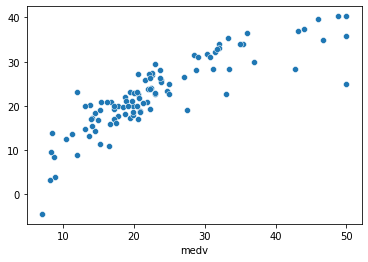

In [23]:
#make the scatter plot
sns.scatterplot(y_test, y_pred)